In [166]:
import matplotlib as mpl

fsize = 20
mpl.rcParams['legend.fontsize'] = fsize
mpl.rcParams["figure.figsize"] = (16,10)
mpl.rcParams['axes.labelsize'] = fsize
mpl.rcParams['xtick.labelsize'] = fsize
mpl.rcParams['ytick.labelsize'] = fsize
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams.update({'font.size': fsize})

import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import datetime
import re

def my_uncertainty(a, a_std):
    a_exp = int(re.search(r'e([-+]?\d+)', "{:.2e}".format(a_std))[1])
    a_rd = 0

    if a_exp<0:
        a_rd = round(a, -a_exp)
    elif a_exp>0:
        a_rd = int(round(a, -a_exp))
    else:
        a_rd = round(a)

    if 0 < a_std < 10:
        a_std_rd = round(a_std*10**(-a_exp))
    elif a_std > 10:
        a_std_rd = round(a_std)

    return str(a_rd), str(a_std_rd)

2141
0
59
time elapsed 266.25
2500
67.01894404 7.469123176723254
4.999702596 2.4306805302176367e-05


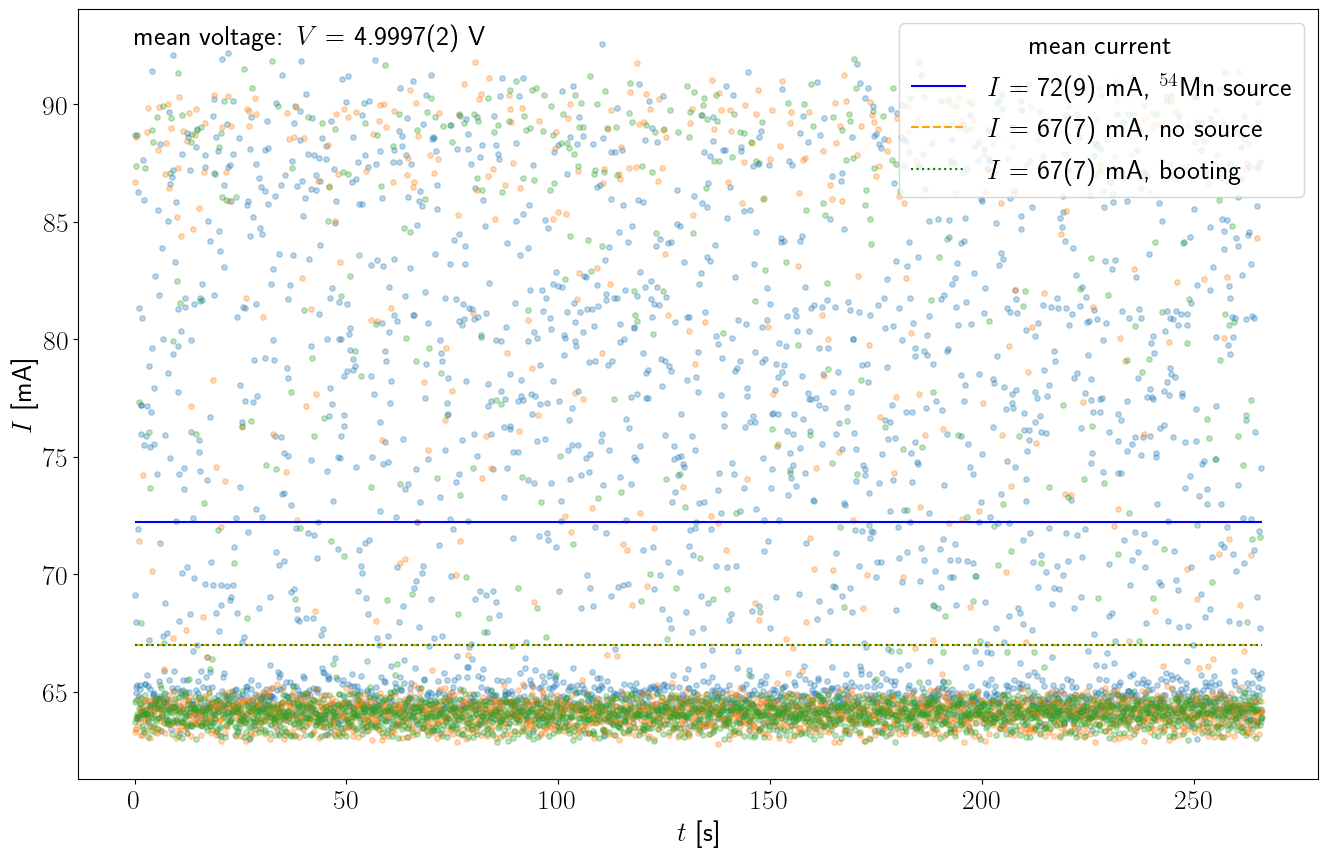

In [167]:
#normal_working_conditions
#high_count_rate
data = np.genfromtxt('CW_high_count_rate.csv', delimiter=",", dtype=[('Index', int), ('I', float), ('V', float), ('t', 'U8'), ('t_f', float)], usecols=[0,1,3,8,9], skip_header=4)

data2 = np.genfromtxt('CW_normal_working_conditions.csv', delimiter=",", dtype=[('Index', int), ('I', float), ('V', float), ('t', 'U8'), ('t_f', float)], usecols=[0,1,3,8,9], skip_header=4)

data3 = np.genfromtxt('CW_booting.csv', delimiter=",", dtype=[('Index', int), ('I', float), ('V', float), ('t', 'U8'), ('t_f', float)], usecols=[0,1,3,8,9], skip_header=4)

def get_seconds(t): #t fomated as H:M:S
    H,M,S = t.split(':')
    return int(datetime.timedelta(hours=int(H),minutes=int(M),seconds=int(S)).total_seconds())

H_list, M_list, S_list = np.array([t.split(':') for t in data['t']]).T.astype(int)

error_t_id = None

for t_id in range(len(data['t'])-1):
    min_diff = int(data['t'][t_id+1].split(':')[1]) - int(data['t'][t_id].split(':')[1])
    if min_diff < 0:
        print(t_id)
        print(int(data['t'][t_id+1].split(':')[1]))
        print(int(data['t'][t_id].split(':')[1]))
        error_t_id = t_id

'''count = 0
dt_f = 0
prev_s = 0
next_s = 0
for t_id in range(len(data['t_f'])-1):
    if t_id == 1579:
        prev_s = S_list[t_id]
        next_s = S_list[t_id+1]
        dt_f += data['t_f'][t_id+1] - data['t_f'][t_id]
        count += 1
    else:
        prev_s = S_list[t_id]
        next_s = S_list[t_id+1]
        if next_s != prev_s:
            dt_f += data['t_f'][t_id+1] + (1-data['t_f'][t_id])
            count += 1
        else:
            dt_f += data['t_f'][t_id+1] - data['t_f'][t_id]
            count += 1

dt_f_mean = dt_f/count
print('dt_f_mean', dt_f_mean)'''


t_0 = get_seconds(data['t'][0])+data['t_f'][0]
t_elapsed = np.vectorize(get_seconds)(data['t'])+data['t_f']-t_0
t_elapsed -= min(t_elapsed)

dt_f = round(data['t_f'][1]-data['t_f'][0],4)
t_ff = dt_f*data['Index'][-1]
print('time elapsed', t_ff)
t_elapsed = np.arange(0, t_ff, dt_f)
print(len(t_elapsed))

fig, ax = plt.subplots()
#ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

#ax1.scatter(t_elapsed, data['V'], color='orange', label=r"$V$ [V]")

data['I'] = data['I']*1000 #mA
data2['I'] = data2['I']*1000 #mA
data3['I'] = data3['I']*1000 #mA
I_upper = 66.5
I_lower = 62.5
I_mean_values = list()
I_event_values = list()
for I_val in data['I']:
    if I_lower <= I_val <= I_upper:
        I_mean_values.append(I_val)
    else:
        I_event_values.append(I_val)

I_mean = np.mean(I_mean_values)
I_std = np.std(I_mean_values)
V_mean = np.mean(data['V'])
V_std = np.std(data['V'])

I_mean = np.mean(data['I'])
I_std = np.std(data['I'])
I2_mean = np.mean(data2['I'])
I2_std = np.std(data2['I'])
I3_mean = np.mean(data3['I'])
I3_std = np.std(data3['I'])

print(I2_mean, I2_std)
print(V_mean, V_std)

tf = max(t_elapsed)

#ax.hlines(I_upper, xmin=0, xmax=tf, color="orange", ls='--')
#ax.fill_between(x=np.arange(0, tf), y1=I_upper, y2=I_lower, color='orange',  interpolate=True, alpha=.4)
#ax.hlines(I_lower, xmin=0, xmax=tf, color="orange", ls='--')

ax.scatter(t_elapsed, data['I'], alpha=0.3, s=15) #mA
ax.scatter(t_elapsed, data2['I'], alpha=0.3, s=15) #mA
ax.scatter(t_elapsed, data3['I'], alpha=0.3, s=15) #mA

#write uncertainty labels
V_inc = my_uncertainty(V_mean, V_std)
V_str = r"$V=$ "+V_inc[0]+"("+V_inc[1]+") V"
ax.text(x=min(t_elapsed), y=max(data['I']), s="mean voltage: "+V_str)

I_inc = my_uncertainty(I_mean, I_std)
I_str = r"$I=$ "+I_inc[0]+"("+I_inc[1]+r") mA, $^{54}$Mn source"

I2_inc = my_uncertainty(I2_mean, I2_std)
I2_str = r"$I=$ "+I2_inc[0]+"("+I2_inc[1]+") mA, no source"

I3_inc = my_uncertainty(I3_mean, I3_std)
I3_str = r"$I=$ "+I3_inc[0]+"("+I3_inc[1]+") mA, booting"

ax.hlines(I_mean, xmin=0, xmax=tf, color="blue", label=I_str)
ax.hlines(I2_mean, xmin=0, xmax=tf, color="orange", ls='--', label=I2_str)
ax.hlines(I3_mean, xmin=0, xmax=tf, color="green", ls=':', label=I3_str)

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$I$ [mA]")
ax.legend(loc="upper right", title="mean current")

#plt.yscale(value='log')

plt.savefig("I_vs_t.pdf", bbox_inches="tight")

In [33]:
print(len(I_event_values))

1309


361.23751454981397 43.4553134247278


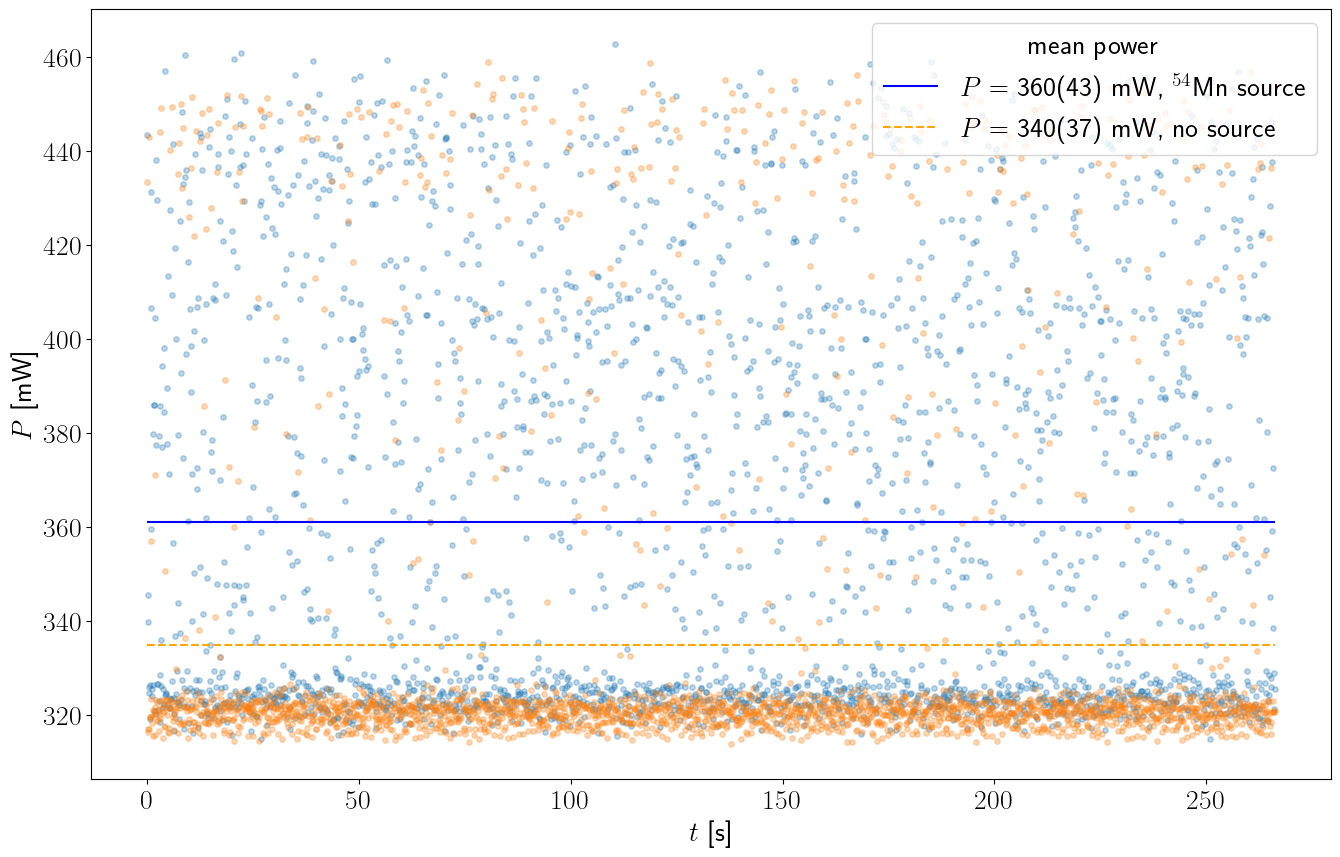

In [168]:
power = data['I']*data['V'] #mW
power2 = data2['I']*data2['V'] #mW
#power3 = data3['I']*data3['V'] #mW

P_mean = np.mean(power)
P2_mean = np.mean(power2)
#P3_mean = np.mean(power3)

P_std = np.std(power)
P2_std = np.std(power2)
#P3_std = np.std(power3)

print(P_mean, P_std)

fig, ax = plt.subplots()
#ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax.scatter(t_elapsed, power, alpha=0.3, s=15)
ax.scatter(t_elapsed, power2, alpha=0.3, s=15)
#ax.scatter(t_elapsed, power3, alpha=0.2, color="green", s=20)
#ax.scatter(t_elapsed, data['I'], label=r"$I$ [A]", alpha=0.6)

P_inc = my_uncertainty(P_mean, P_std)
P_str = r"$P=$ "+P_inc[0]+"("+P_inc[1]+r") mW, $^{54}$Mn source"

P2_inc = my_uncertainty(P2_mean, P2_std)
P2_str = r"$P=$ "+P2_inc[0]+"("+P2_inc[1]+") mW, no source"

#P3_inc = my_uncertainty(P3_mean, P3_std)
#P3_str = r"$P=$ "+P3_inc[0]+"("+P3_inc[1]+") mW, booting"

ax.hlines(P_mean, xmin=0, xmax=tf, color="blue", label=P_str)
ax.hlines(P2_mean, xmin=0, xmax=tf, color="orange", ls='--', label=P2_str)
#ax.hlines(P3_mean, xmin=0, xmax=tf, color="green", ls=':')

ax.set_xlabel(r"$t$ [s]")
ax.set_ylabel(r"$P$ [mW]")
#ax1.set_ylabel(r"$P$ [W]")

ax.legend(loc='upper right', title="mean power")
#ax1.legend(loc='upper right')

plt.savefig("P_vs_t.pdf", bbox_inches="tight")

In [165]:
P_total = sum(power)

P_s = P_mean*dt_f #mWs

Power_dt_f = power*dt_f
Power_consumption = sum(Power_dt_f) #mWs

print(Power_consumption, 'mWs')
print(Power_consumption/(1e6*3600), 'kWh')

P_consumption = P_mean*t_ff/(1e6*3600)
P2_consumption = P2_mean*t_ff/(1e6*3600)

P_cons_unc = P_consumption*P_std/P_mean
P2_cons_unc = P2_consumption*P2_std/P2_mean

print(my_uncertainty(P_consumption, P_cons_unc))
print(my_uncertainty(P2_consumption, P2_cons_unc))

96179.48824888772 mWs
2.671652451357992e-05 kWh
('2.7e-05', '3')
('2.5e-05', '3')
